# KLIB

KLIB is a Python library for importing, cleaning, analyzing and preprocessing data

- https://pypi.org/project/klib/

    
- https://monalishakumari.medium.com/exploratory-data-analysis-with-klib-library-in-python-25e511e7dce0


- https://github.com/akanz1/klib/tree/main/examples

In [ ]:
# Installation

# !pip install -U klib

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Automate EDA

import klib

## Seaborn Libraries

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Load Iris Dataset

In [3]:
df_iris = sns.load_dataset('iris')

In [20]:
df_iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# klib.describe - functions for visualizing datasets


- klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features


- klib.corr_mat(df) # returns a color-encoded correlation matrix


- klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations


- klib.corr_interactive_plot(df, split="neg").show() # returns an interactive correlation plot using plotly


- klib.dist_plot(df) # returns a distribution plot for every numeric feature


- klib.missingval_plot(df) # returns a figure containing information about missing values

# klib.clean - functions for cleaning datasets

- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)


- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()


- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()


- klib.drop_missing(df) # drops missing values, also called in data_cleaning()


- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content


- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

## klib.describe - functions for visualizing datasets

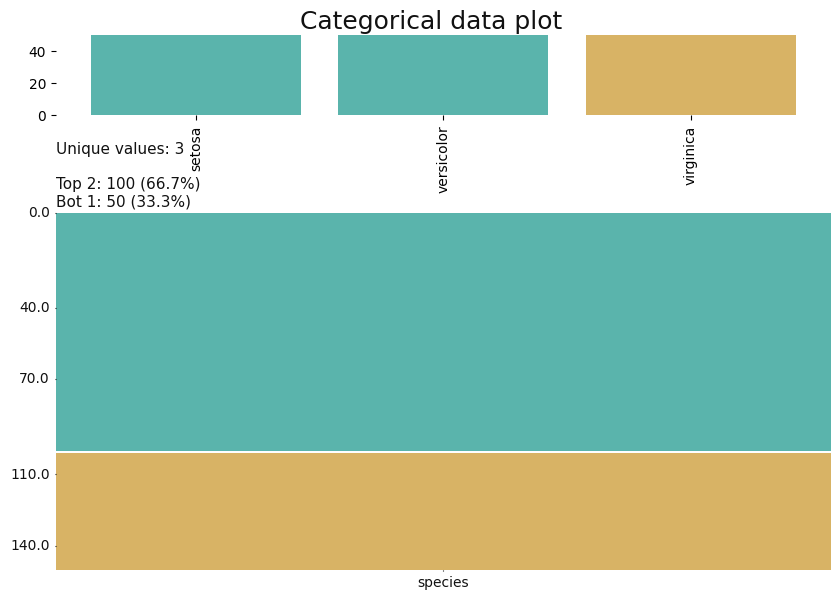

In [12]:
# returns a visualization of the number and frequency of categorical features
klib.cat_plot(df_iris, figsize=(10, 7));

In [13]:
# Returns a color-encoded correlation matrix
klib.corr_mat(df_iris)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


In [45]:
# KLIB does not accept continuos variables for Target Variable

df_map_species = df_iris.copy()

df_map_species['species'] = df_iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
df_map_species['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

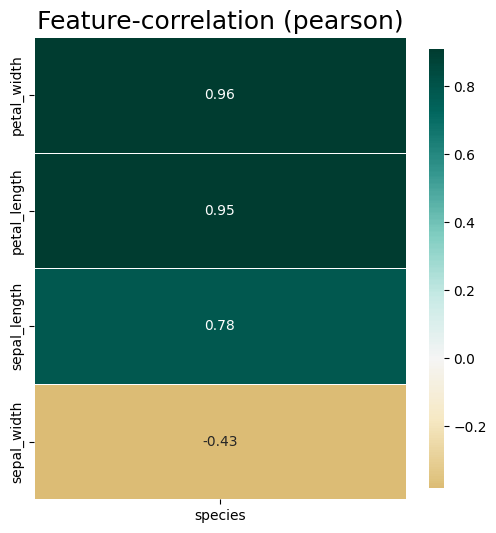

In [49]:
# Correlations with Target Varaible 'species'
klib.corr_plot(df_map_species, target='species', figsize=(6,6));

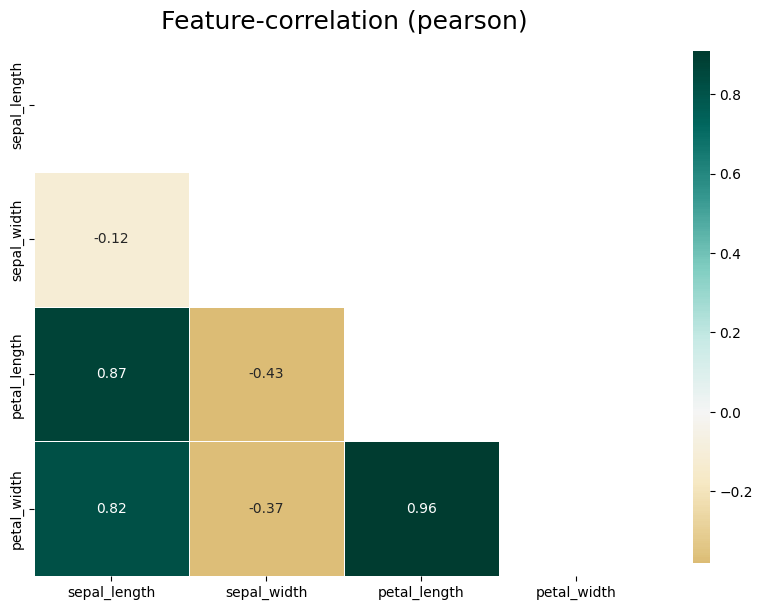

In [15]:
# Returns a color-encoded heatmap, ideal for correlations
klib.corr_plot(df_iris, figsize=(10, 7));

In [18]:
# Returns an interactive correlation plot using plotly

split = [None, 'neg', 'pos', 'low', 'high']

for split in split:
    klib.corr_interactive_plot(df_iris, split=split, figsize=(4, 2)).show()

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


Displaying positive correlations. Specify a positive "threshold" to limit the results further.


Displaying absolute correlations below the threshold (0.3). Specify a positive "threshold" to limit the results further.


Displaying absolute correlations above the threshold (0.3). Specify a positive "threshold" to limit the results further.


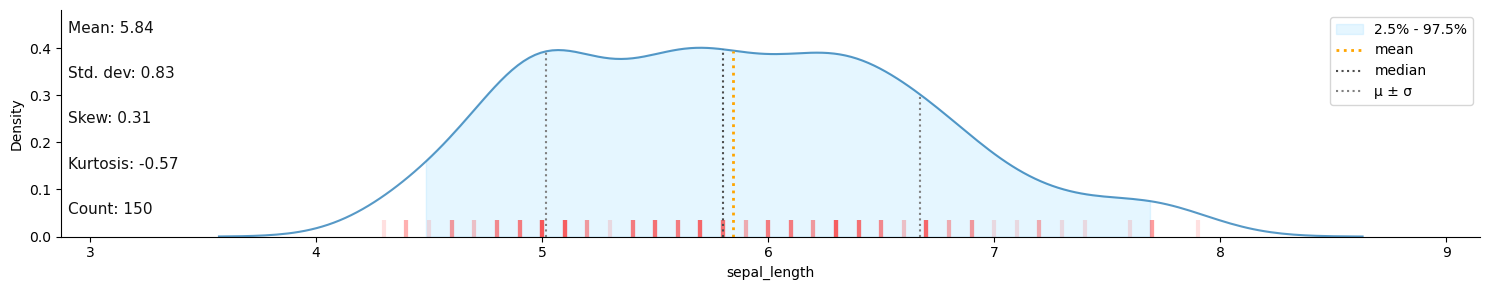

In [9]:
# Returns a distribution plot for every numeric feature
klib.dist_plot(df_iris);

In [10]:
# returns a figure containing information about missing values
klib.missingval_plot(df_iris) 

No missing values found in the dataset.


## klib.clean - functions for cleaning datasets

In [11]:
# performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(df_iris) 

Shape of cleaned data: (149, 5) - Remaining NAs: 0


Dropped rows: 1
     of which 1 duplicates. (Rows (first 150 shown): [142])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.01 MB (-100.0%)



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica
